# import & config

In [18]:
import os
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
from scipy.stats import pearsonr
from skimage.metrics import structural_similarity as ssim

In [19]:
train_path = "./data/train"
test_path =  "./data/test"

# train Îç∞Ïù¥ÌÑ∞ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ ÌôïÏù∏

In [20]:
def analyze_class_distribution(train_dir: str, top_n: int = 10):
    """
    Ï£ºÏñ¥ÏßÑ train Ìè¥Îçî Í≤ΩÎ°úÏóêÏÑú ÌÅ¥ÎûòÏä§Î≥Ñ Ïù¥ÎØ∏ÏßÄ ÏàòÎ•º ÏÑ∏Í≥†,
    ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ Í∑∏Î¶¨Í≥†, ÏÉÅÏúÑ NÍ∞ú ÌÅ¥ÎûòÏä§Î™ÖÏùÑ Ï∂úÎ†•Ìï©ÎãàÎã§.

    Args:
        train_dir (str): 'train' Ìè¥ÎçîÏùò Í≤ΩÎ°ú (Í∞Å ÌÅ¥ÎûòÏä§ ÏÑúÎ∏åÌè¥Îçî Ìè¨Ìï®)
        top_n (int): Í∞ÄÏû• ÎßéÏùÄ Ïù¥ÎØ∏ÏßÄÎ•º Í∞ÄÏßÑ ÏÉÅÏúÑ ÌÅ¥ÎûòÏä§ Í∞úÏàò
    """
    class_counts = {}

    # ÌÅ¥ÎûòÏä§ Ìè¥ÎçîÎ≥Ñ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò Í≥ÑÏÇ∞
    for class_name in os.listdir(train_dir):
        class_path = os.path.join(train_dir, class_name)
        if os.path.isdir(class_path):
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith('.jpg')]
            class_counts[class_name] = len(image_files)

    # ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
    sorted_classes = sorted(class_counts.items(), key=lambda x: x[0])  # ÌÅ¥ÎûòÏä§Î™Ö Í∏∞Ï§Ä Ï†ïÎ†¨
    labels, counts = zip(*sorted_classes)
    labels = [i for i in range(len(labels))]

    plt.figure(figsize=(18, 6))
    plt.bar(labels, counts)
    plt.xticks(rotation=90)
    plt.title("Class-wise Image Count")
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.tight_layout()
    plt.show()

    print(f"mean counts : {np.mean(counts)}")

    # ÏÉÅÏúÑ NÍ∞ú Ï∂úÎ†•
    print(f"\nTop {top_n} classes with most images:")
    for cls, cnt in sorted(class_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]:
        print(f"{cls}: {cnt} images")
    

    # ÌïòÏúÑ NÍ∞ú Ï∂úÎ†•
    print(f"\nUnder {top_n} classes with most images:")
    for cls, cnt in sorted(class_counts.items(), key=lambda x: x[1], reverse=False)[:top_n]:
        print(f"{cls}: {cnt} images")

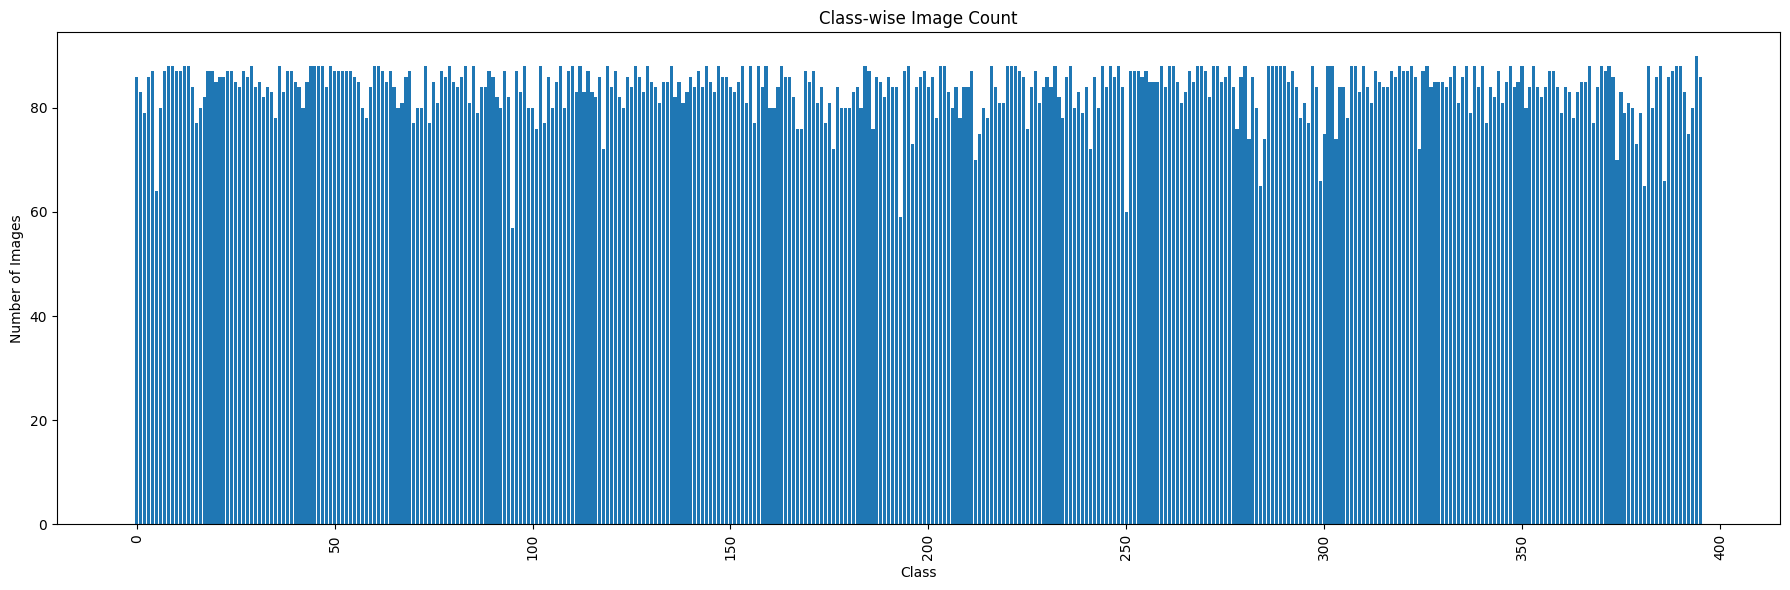

mean counts : 83.67929292929293

Top 20 classes with most images:
ÌîÑÎ¶¨Ïö∞Ïä§_4ÏÑ∏ÎåÄ_2019_2022: 90 images
3ÏãúÎ¶¨Ï¶à_E90_2005_2012: 88 images
3ÏãúÎ¶¨Ï¶à_F30_2013_2018: 88 images
3ÏãúÎ¶¨Ï¶à_GT_F34_2014_2021: 88 images
4ÏãúÎ¶¨Ï¶à_F32_2014_2020: 88 images
7ÏãúÎ¶¨Ï¶à_G11_2019_2022: 88 images
A5_F5_2019_2024: 88 images
All_New_XJ_2016_2019: 88 images
B_ÌÅ¥ÎûòÏä§_W246_2013_2018: 88 images
CLA_ÌÅ¥ÎûòÏä§_C117_2014_2019: 88 images
CLA_ÌÅ¥ÎûòÏä§_C118_2020_2025: 88 images
CLS_ÌÅ¥ÎûòÏä§_C257_2019_2023: 88 images
EV6_2022_2024: 88 images
EV9_2024_2025: 88 images
G80_RG3_2025: 88 images
GLC_ÌÅ¥ÎûòÏä§_X253_2017_2019: 88 images
GLE_ÌÅ¥ÎûòÏä§_W166_2016_2018: 88 images
GLS_ÌÅ¥ÎûòÏä§_X166_2017_2019: 88 images
K7_ÌîÑÎ¶¨ÎØ∏Ïñ¥_ÌïòÏù¥Î∏åÎ¶¨Îìú_2020_2021: 88 images
M2_F87_2016_2021: 88 images

Under 20 classes with most images:
K5_3ÏÑ∏ÎåÄ_ÌïòÏù¥Î∏åÎ¶¨Îìú_2020_2022: 57 images
Îâ¥_QM6_2021_2023: 59 images
Îîî_Ïò¨_Îâ¥_Ïä§Ìè¨Ìã∞ÏßÄ_2022_2024: 60 images
2ÏãúÎ¶¨Ï¶à_Ïï°Ìã∞Î∏å_Ìà¨Ïñ¥Îü¨_F45_2019_2021: 64 images
Îß

In [21]:
analyze_class_distribution(train_path, 20)

# train/test Îç∞Ïù¥ÌÑ∞ ÏßÅÏ†ë ÌôïÏù∏Ìï¥Î≥¥Í∏∞

In [5]:
def show_random_images_from_random_classes(train_dir: str, num_classes: int = 5):
    """
    Ï£ºÏñ¥ÏßÑ train ÎîîÎ†âÌÜ†Î¶¨ÏóêÏÑú Î¨¥ÏûëÏúÑ ÌÅ¥ÎûòÏä§ NÍ∞úÎ•º ÏÑ†ÌÉùÌïòÍ≥†, Í∞Å ÌÅ¥ÎûòÏä§ÏóêÏÑú ÎûúÎç§ Ïù¥ÎØ∏ÏßÄÎ•º ÌïòÎÇòÏî© ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.

    Args:
        train_dir (str): ÌÅ¥ÎûòÏä§ Ìè¥ÎçîÎì§Ïù¥ Îì§Ïñ¥ ÏûàÎäî train Ìè¥Îçî Í≤ΩÎ°ú
        num_classes (int): Î¨¥ÏûëÏúÑÎ°ú ÏÑ†ÌÉùÌï† ÌÅ¥ÎûòÏä§ Ïàò
    """
    all_classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
    selected_classes = random.sample(all_classes, min(num_classes, len(all_classes)))

    plt.figure(figsize=(4 * num_classes, 4))

    for idx, class_name in enumerate(selected_classes):
        class_dir = os.path.join(train_dir, class_name)
        image_files = [f for f in os.listdir(class_dir) if f.lower().endswith('.jpg')]
        if not image_files:
            continue
        img_path = os.path.join(class_dir, random.choice(image_files))
        img = Image.open(img_path)

        plt.subplot(1, num_classes, idx + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

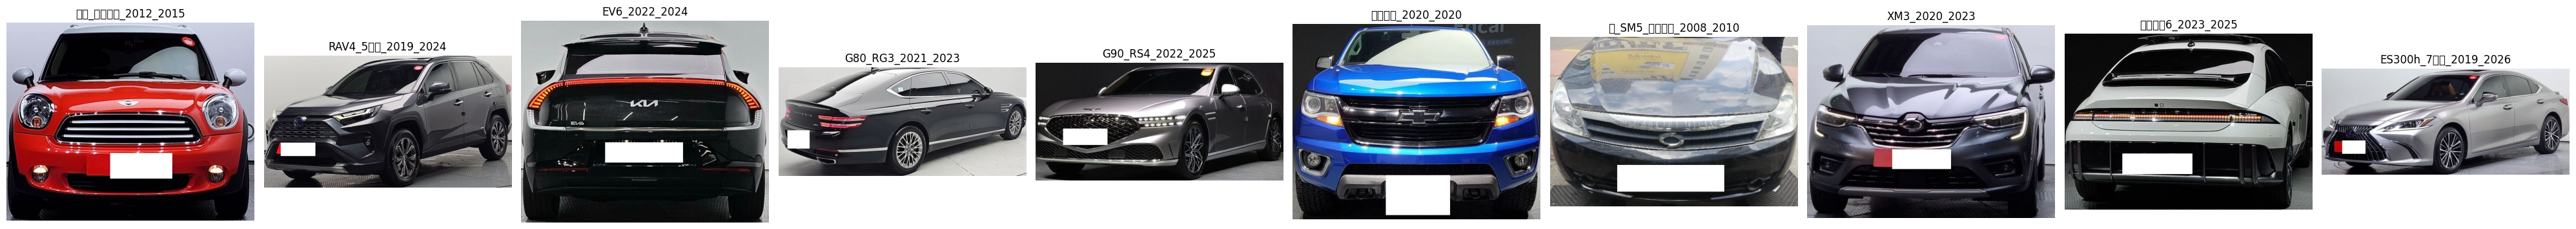

In [6]:
show_random_images_from_random_classes(train_path, 10)

# ÌèâÍ∑† Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶à ÌôïÏù∏

## train

In [7]:
def analyze_image_distribution_and_correlation(train_dir):
    widths, heights, sizes, ratios = [], [], [], []

    for root, _, files in os.walk(train_dir):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(root, file)
                try:
                    with Image.open(img_path) as img:
                        w, h = img.size
                    size = os.path.getsize(img_path)

                    if h > 0:  # heightÍ∞Ä 0Ïù∏ Í≤ΩÏö∞ Î∞©ÏßÄ
                        ratio = w / h
                        ratios.append(ratio)
                        widths.append(w)
                        heights.append(h)
                        sizes.append(size)
                except:
                    continue  # Íπ®ÏßÑ ÌååÏùº Îì± Î¨¥Ïãú

    # 1. width, height, size Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(30, 5))

    plt.subplot(1, 5, 1)
    plt.hist(widths, bins=50, color='skyblue')
    plt.title('Image Width Distribution')
    plt.xlabel('Width (px)')
    plt.ylabel('Count')

    plt.subplot(1, 5, 2)
    plt.hist(heights, bins=50, color='salmon')
    plt.title('Image Height Distribution')
    plt.xlabel('Height (px)')
    plt.ylabel('Count')

    plt.subplot(1, 5, 3)
    plt.hist(sizes, bins=50, color='lightgreen')
    plt.title('Image File Size Distribution')
    plt.xlabel('File Size (Bytes)')
    plt.ylabel('Count')

    # 2. width vs height ÏÇ∞Ï†êÎèÑ
    plt.subplot(1, 5, 4)
    plt.scatter(widths, heights, alpha=0.3, s=5, color='purple')
    plt.title('Width vs Height Scatter Plot')
    plt.xlabel('Width (px)')
    plt.ylabel('Height (px)')
    plt.grid(True)

    # 3. aspect ratio Î∂ÑÌè¨ÎèÑ Ï∂îÍ∞Ä
    plt.subplot(1, 5, 5)
    plt.hist(ratios, bins=50, color='orange', edgecolor='black')
    plt.title('Aspect Ratio (Width / Height) Distribution')
    plt.xlabel('Aspect Ratio')
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 4. ÏÉÅÍ¥ÄÍ≥ÑÏàò
    if len(widths) > 1:
        corr_coef, p_value = pearsonr(widths, heights)
        print(f"üìä Pearson Correlation (Width vs Height): {corr_coef:.4f} (p = {p_value:.4e})")
    
    # 5. ÌèâÍ∑† Ï†ïÎ≥¥ Ï∂úÎ†•
    if widths:
        print(f"\nüìà Total images       : {len(widths)}")
        print(f"Average Width         : {np.mean(widths):.2f} px")
        print(f"Average Height        : {np.mean(heights):.2f} px")
        print(f"Average File Size     : {np.mean(sizes):.2f} Bytes")
        print(f"Average Aspect Ratio  : {np.mean(ratios):.4f}")


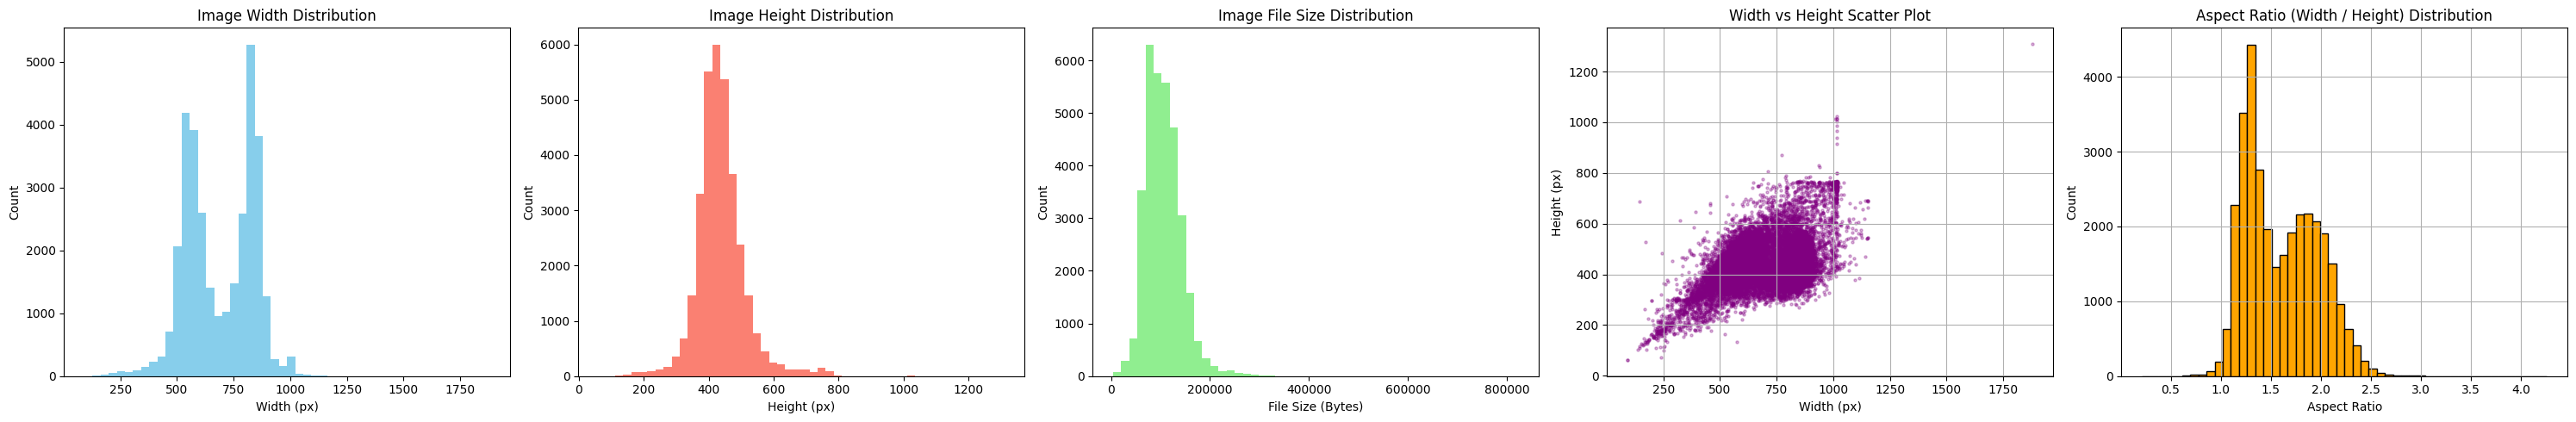

üìä Pearson Correlation (Width vs Height): 0.3607 (p = 0.0000e+00)

üìà Total images       : 33137
Average Width         : 690.29 px
Average Height        : 436.58 px
Average File Size     : 105906.62 Bytes
Average Aspect Ratio  : 1.6033


In [8]:
analyze_image_distribution_and_correlation(train_path)

## test

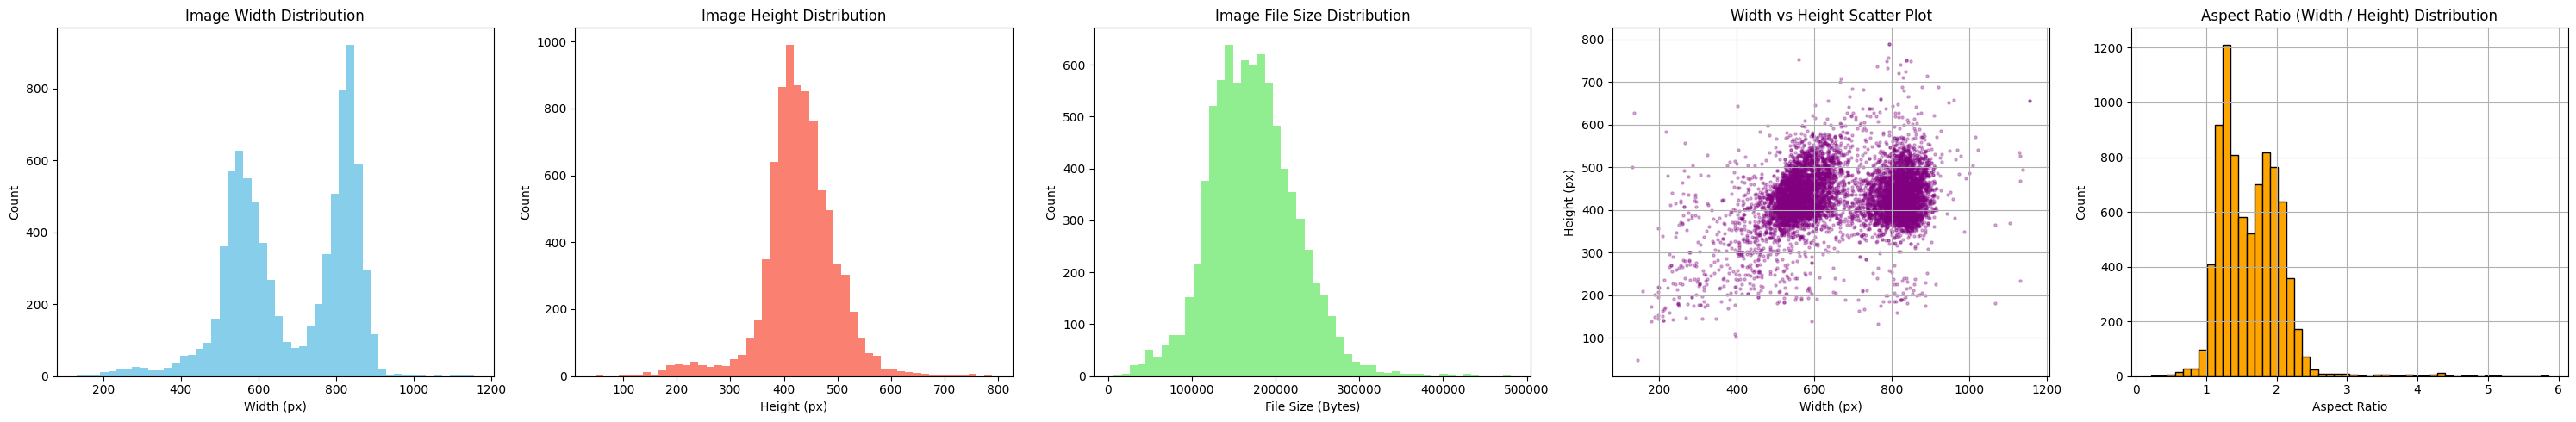

üìä Pearson Correlation (Width vs Height): 0.2359 (p = 8.3409e-105)

üìà Total images       : 8258
Average Width         : 682.87 px
Average Height        : 429.76 px
Average File Size     : 172921.53 Bytes
Average Aspect Ratio  : 1.6196


In [9]:
analyze_image_distribution_and_correlation(test_path)

# Brightness Î∂ÑÌè¨

In [10]:
def analyze_brightness_and_features(root_folder):
    brightness_values = []
    saturation_values = []
    value_values = []

    for root, _, files in os.walk(root_folder):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(root, file)
                try:
                    with Image.open(img_path).convert('RGB') as img:
                        # Resize to speed up if needed
                        img = img.resize((256, 256))

                        # 1. Brightness: grayscale average
                        gray = img.convert('L')
                        brightness = np.array(gray).mean()
                        brightness_values.append(brightness)

                        # 2. Saturation & Value from HSV
                        hsv = img.convert('HSV')
                        hsv_np = np.array(hsv)
                        saturation = hsv_np[:, :, 1].mean()
                        value = hsv_np[:, :, 2].mean()

                        saturation_values.append(saturation)
                        value_values.append(value)
                except Exception as e:
                    continue  # ÏÜêÏÉÅÎêú Ïù¥ÎØ∏ÏßÄ Î¨¥Ïãú

    # 1. ÏãúÍ∞ÅÌôî
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle("Image Brightness, Saturation, and Value Distributions", fontsize=15)

    axs[0].hist(brightness_values, bins=50, color='gray', edgecolor='black')
    axs[0].set_title("Brightness (Grayscale)")
    axs[0].set_xlabel("Brightness (0~255)")
    axs[0].set_ylabel("Count")

    axs[1].hist(saturation_values, bins=50, color='orange', edgecolor='black')
    axs[1].set_title("Saturation (HSV - S Channel)")
    axs[1].set_xlabel("Saturation (0~255)")
    axs[1].set_ylabel("Count")

    axs[2].hist(value_values, bins=50, color='blue', edgecolor='black')
    axs[2].set_title("Value (HSV - V Channel)")
    axs[2].set_xlabel("Value (0~255)")
    axs[2].set_ylabel("Count")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # 2. ÌÜµÍ≥Ñ Ï∂úÎ†•
    print(f"üìä Processed Images: {len(brightness_values)}")
    print(f"üü° Brightness (Gray): Mean={np.mean(brightness_values):.2f}, Std={np.std(brightness_values):.2f}")
    print(f"üü† Saturation (HSV S): Mean={np.mean(saturation_values):.2f}, Std={np.std(saturation_values):.2f}")
    print(f"üîµ Value (HSV V): Mean={np.mean(value_values):.2f}, Std={np.std(value_values):.2f}")


## train

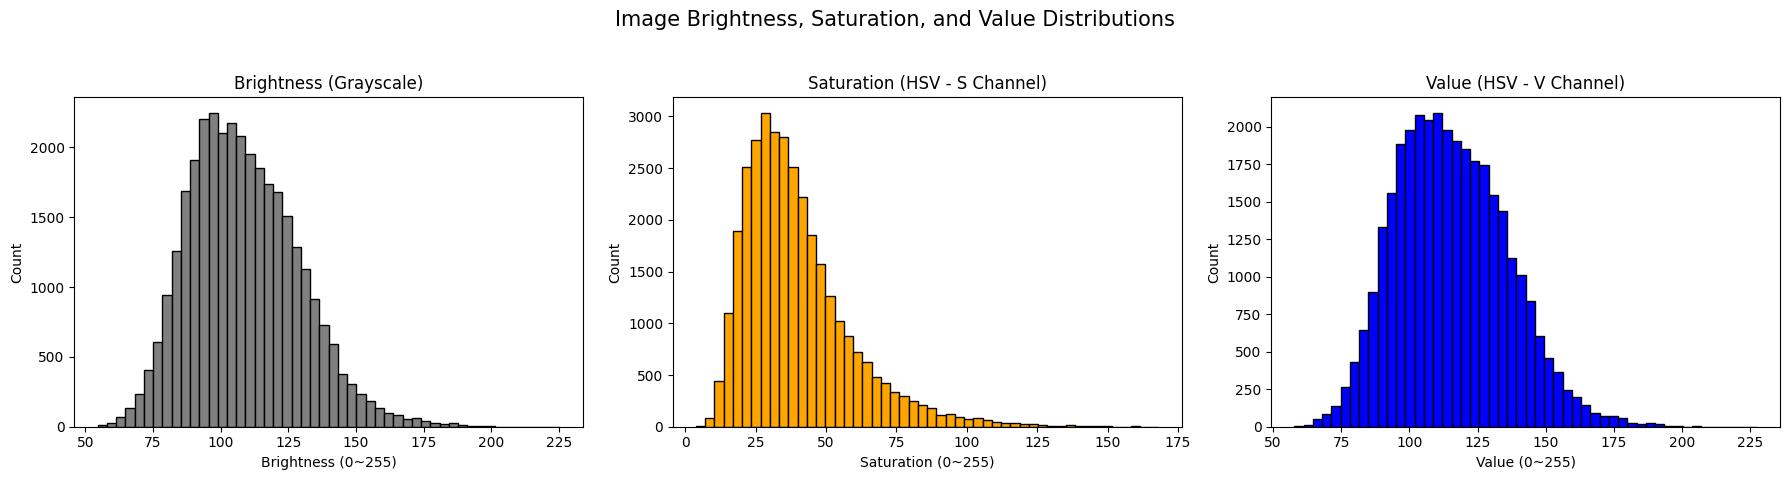

üìä Processed Images: 33137
üü° Brightness (Gray): Mean=108.58, Std=20.27
üü† Saturation (HSV S): Mean=39.53, Std=19.06
üîµ Value (HSV V): Mean=115.48, Std=20.43


In [11]:
analyze_brightness_and_features(train_path)

## test

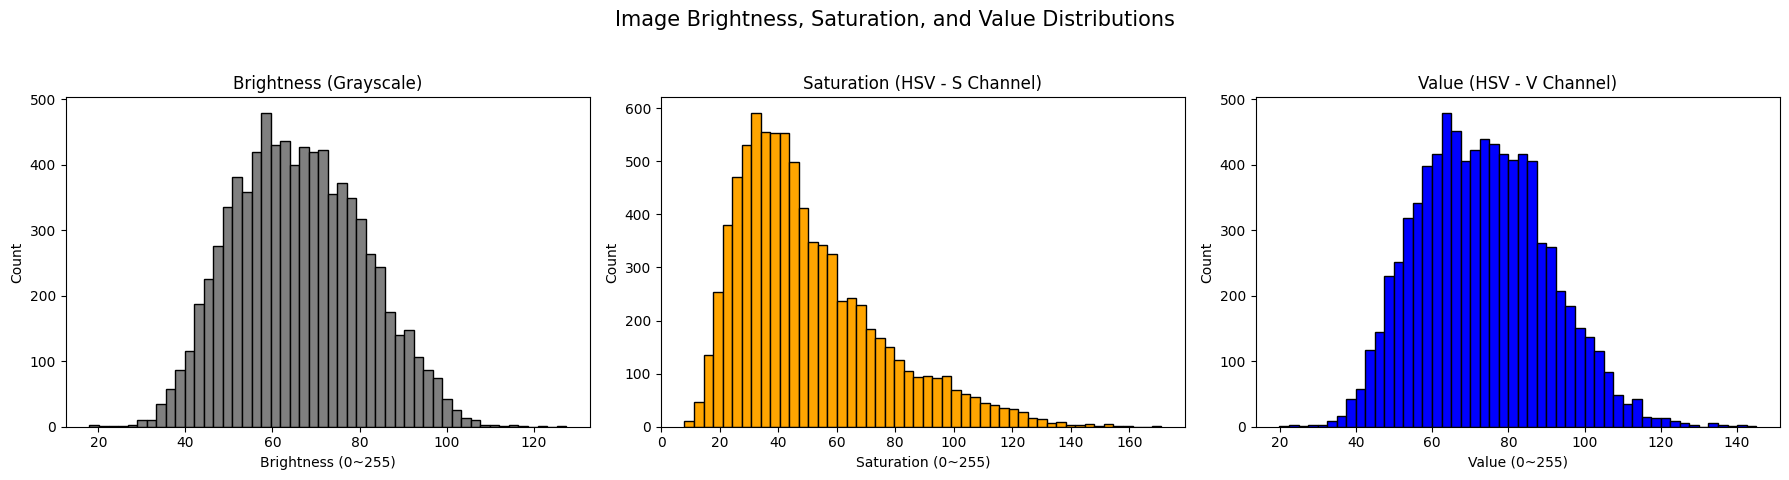

üìä Processed Images: 8258
üü° Brightness (Gray): Mean=66.13, Std=14.88
üü† Saturation (HSV S): Mean=50.12, Std=24.54
üîµ Value (HSV V): Mean=73.26, Std=16.84


In [12]:
analyze_brightness_and_features(test_path)

# Í∞ôÏùÄ ÌÅ¥ÎûòÏä§ ÎÇ¥ Ïú†ÏÇ¨ÎèÑ Í≤ÄÏÇ¨?

In [15]:
import os
from PIL import Image
import numpy as np
from skimage.metrics import structural_similarity as ssim
from itertools import combinations
from tqdm import tqdm

def find_outlier_by_ssim(class_dir, resize_to=(512, 512)):
    """
    Í∞ôÏùÄ ÌÅ¥ÎûòÏä§ ÎîîÎ†âÌÜ†Î¶¨ ÏïàÏùò Ïù¥ÎØ∏ÏßÄÎì§ Í∞Ñ SSIM Ïú†ÏÇ¨ÎèÑÎ•º Í≥ÑÏÇ∞Ìï¥
    ÌèâÍ∑† SSIMÏù¥ Í∞ÄÏû• ÎÇÆÏùÄ Ïù¥ÎØ∏ÏßÄÎ•º ÏïÑÏõÉÎùºÏù¥Ïñ¥Î°ú ÌåêÎã®Ìï©ÎãàÎã§.

    Args:
        class_dir (str): ÌÅ¥ÎûòÏä§ Ìè¥Îçî Í≤ΩÎ°ú
        resize_to (tuple): Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞ ÌëúÏ§ÄÌôî (default: 256x256)
    """
    image_paths = [
        os.path.join(class_dir, f)
        for f in os.listdir(class_dir)
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ]

    if len(image_paths) < 2:
        print("Ïù¥ÎØ∏ÏßÄÍ∞Ä 2Ïû• Ïù¥ÏÉÅ ÏûàÏñ¥Ïïº SSIM Î∂ÑÏÑùÏù¥ Í∞ÄÎä•Ìï©ÎãàÎã§.")
        return

    # Ïù¥ÎØ∏ÏßÄ Î°úÎî© & Ï†ÑÏ≤òÎ¶¨ (grayscale, resize)
    images = []
    for path in image_paths:
        try:
            img = Image.open(path).convert("L").resize(resize_to)
            images.append((path, np.array(img)))
        except:
            print(f"Î∂àÎü¨Ïò§Í∏∞ Ïã§Ìå®: {path}")

    N = len(images)
    ssim_matrix = np.zeros((N, N))

    # SSIM Í≥ÑÏÇ∞ (ÌïòÎÇòÏùò ÏÇºÍ∞Å ÌñâÎ†¨Îßå Í≥ÑÏÇ∞Ìï¥ÎèÑ Ï∂©Î∂Ñ)
    for (i, (p1, im1)), (j, (p2, im2)) in tqdm(combinations(enumerate(images), 2), total=N*(N-1)//2, desc="Calculating SSIM"):
        score = ssim(im1, im2)
        ssim_matrix[i, j] = score
        ssim_matrix[j, i] = score

    # ÌèâÍ∑† SSIM Í≥ÑÏÇ∞ (ÏûêÍ∏∞ ÏûêÏã† Ï†úÏô∏)
    avg_ssim_per_image = (np.sum(ssim_matrix, axis=1) - 1) / (N - 1)

    # Í∞ÄÏû• ÌèâÍ∑† SSIMÏù¥ ÎÇÆÏùÄ Ïù¥ÎØ∏ÏßÄ Ï∞æÍ∏∞
    outlier_index = np.argmin(avg_ssim_per_image)
    outlier_path = images[outlier_index][0]

    # Í≤∞Í≥º Ï∂úÎ†•
    print(f"\nüö® Outlier (Í∞ÄÏû• Ïú†ÏÇ¨ÎèÑÍ∞Ä ÎÇÆÏùÄ Ïù¥ÎØ∏ÏßÄ): {os.path.basename(outlier_path)}")
